<a href="https://colab.research.google.com/github/cole-beach/California_Housing_Market/blob/main/California_Housing_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# California Housing Data

I'm going to explore California's median housing prices through a dataset I found on Kaggle. [California Housing Data](https://www.kaggle.com/datasets/dhirajnirne/california-housing-data).

In [71]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [72]:
path = '/content/drive/MyDrive/Coding Dojo: Data Science/Portfolio/Zillow/California_Housing.csv'
df = pd.read_csv(path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [73]:
df.shape

(20640, 10)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [75]:
df.drop(columns='ocean_proximity', inplace=True)

In [76]:
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

In [77]:
df.dropna(inplace=True)

In [78]:
df.shape

(20433, 9)

In [79]:
df.duplicated().any()

False

In [80]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [81]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

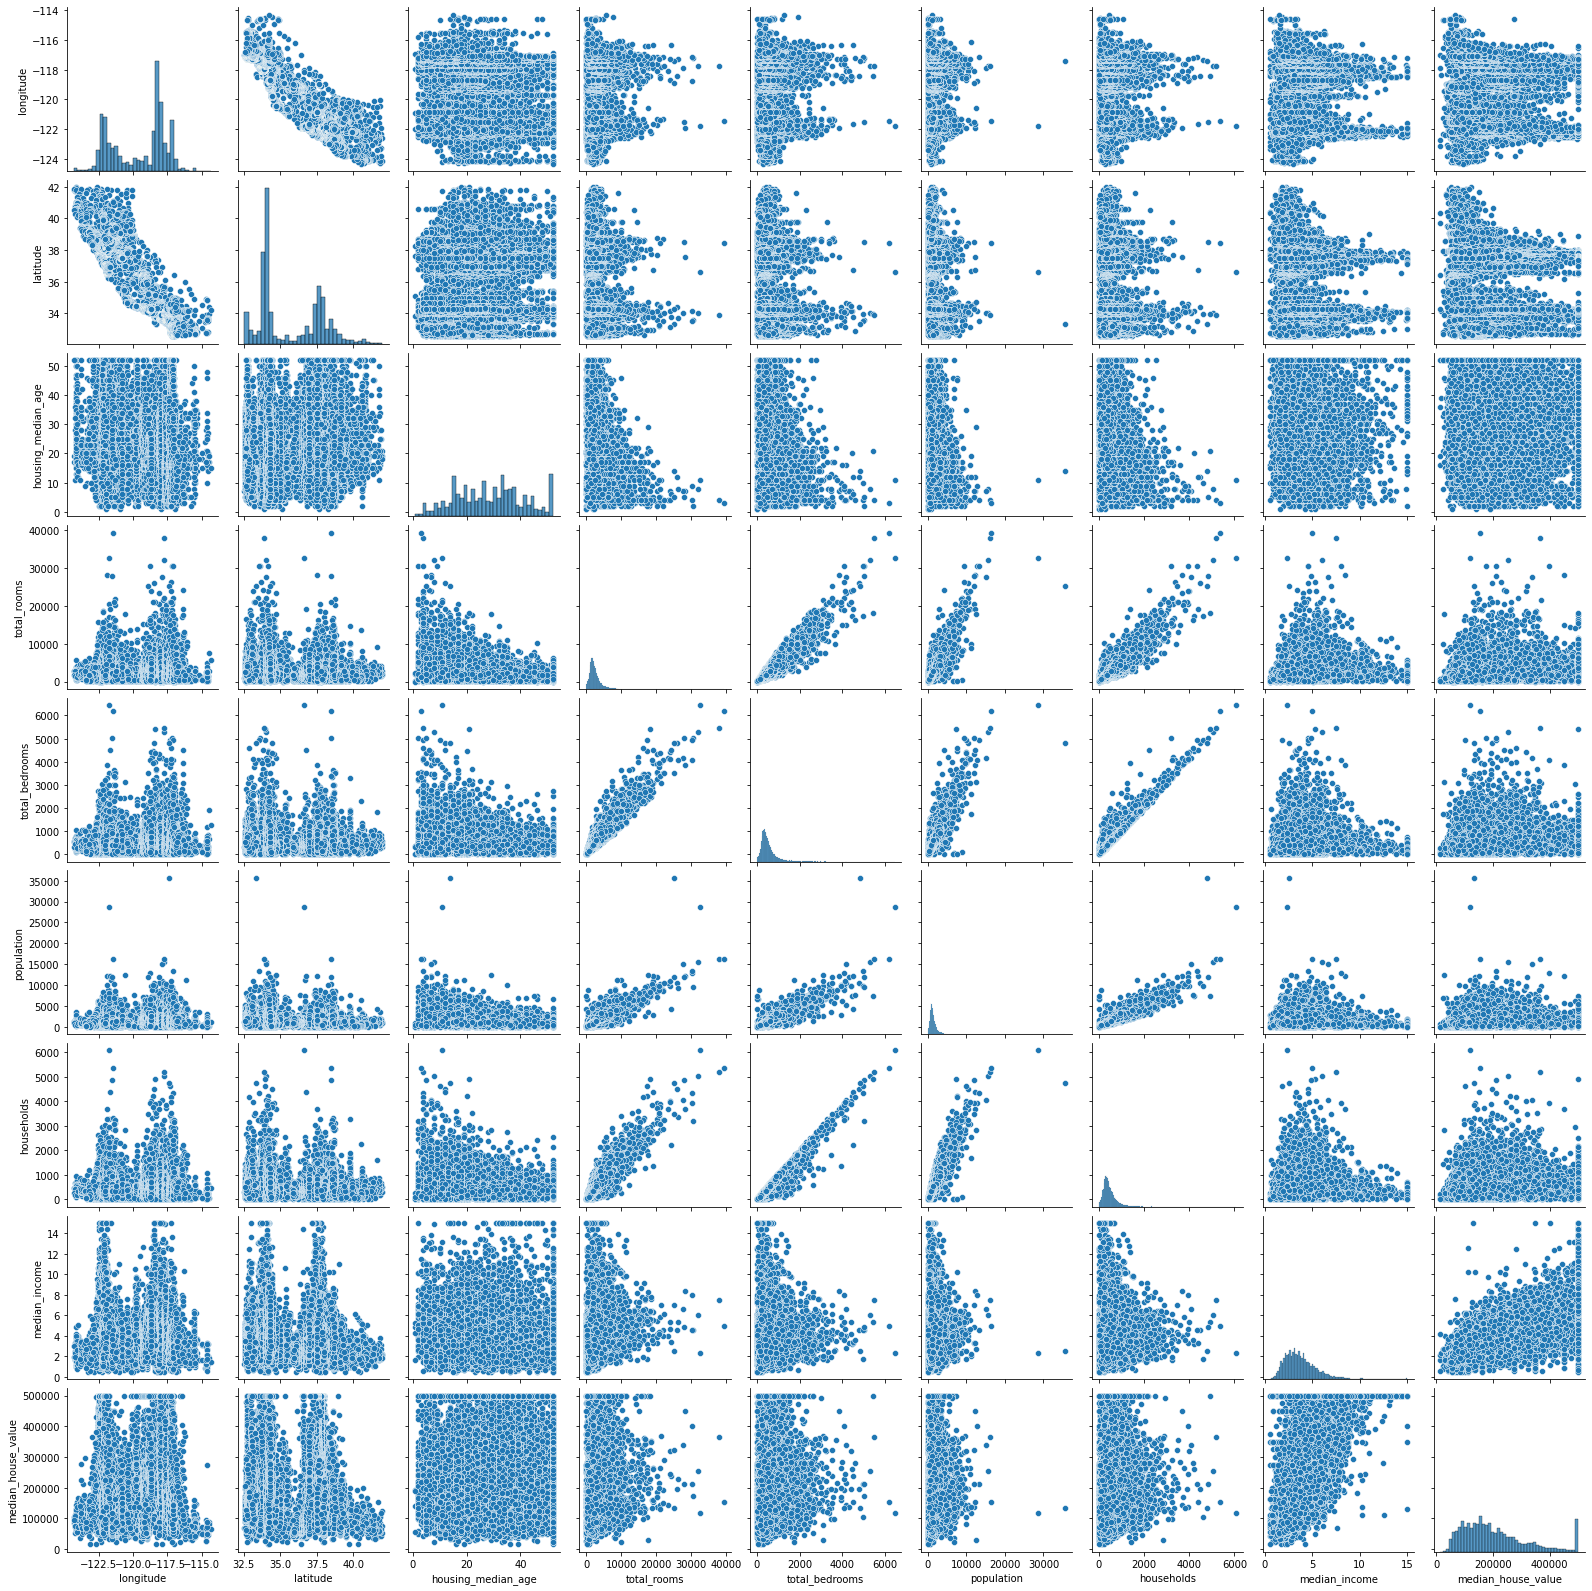

In [82]:
sns.pairplot(data=df);

## Initial View

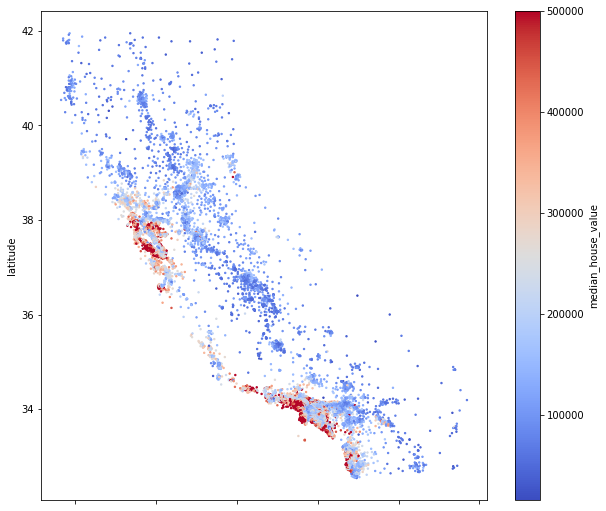

In [83]:
df.plot(kind = 'scatter',x ='longitude',y = 'latitude',c= 'median_house_value',cmap = 'coolwarm',figsize = (10,9),s=2);

In [84]:
# Lets use plotly a cool way to show houses on a map

import plotly.express as px
# Documentation: https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

px.scatter_mapbox(df, lat='latitude',lon='longitude',color='median_house_value',
                  mapbox_style="open-street-map",)

From the view on the map above you'll notice that Central Valley (Middle California) offers lower rates, since this is majority farm land, whereas you get closer to the coastal regions the average pice of the homes increase. This isn't true for all of California nice you can see that North of San Francisco would offer resonable prices (at one point in time). 

On the interactive map you'll also see that Lake Tahoe median home prices are going to be higher and if you zoom in closer and locate Mammoth Lakes, the median home rates are we'll over 200k. This could also prove to be an outdated dataset since Mammoth has grown over the last 10 years drawing in larger community contractors and comercial homes. 

In [85]:
# Without clusters
# Split the data in train and test

X = df.drop(columns = ['median_house_value'])
y = df['median_house_value']
X_train , X_test , y_train ,y_test = train_test_split(X, y ,random_state= 42, test_size=0.2)

In [86]:
# Prepare the data for clustring by Scaling it
# Note: If any other preprocessing steps are needed you can add here

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns= X.columns)

X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.106514,0.786208,-1.162062,0.829311,0.929297,1.131110,1.040744,0.438412
1,-0.024671,0.467873,0.348657,-0.738558,-0.850523,-0.708899,-0.856152,-0.242389
2,0.758045,-0.711838,-0.287435,0.587350,0.747242,0.378459,0.691525,-0.108969
3,0.633408,-0.735245,-0.048901,-0.122742,0.989183,1.185124,1.048681,-0.861168
4,1.151895,-1.217429,-0.128412,-0.365632,-0.345083,-0.105008,-0.247664,-0.168986
...,...,...,...,...,...,...,...,...
16341,0.802914,-0.899094,-0.366947,0.169376,-0.086375,0.014531,-0.118029,0.820914
16342,1.017288,-0.880369,-1.877666,1.495284,1.195192,1.626974,1.331760,0.487838
16343,0.578568,-0.763334,1.064261,-0.479414,-0.400179,-0.414923,-0.358779,-0.406634
16344,-1.226165,0.903243,-1.321086,1.436303,1.264660,1.784588,1.479914,0.746774


## Modeling Data

In [87]:
# Without clusters

model = LinearRegression()
model.fit(X_train,y_train)

print('Training r2:', model.score(X_train, y_train))
print('Testing r2:', model.score(X_test, y_test))

Training r2: 0.6360185727313742
Testing r2: -600763.7796776368


In [88]:
# Function to calculate and plot the silhouette score and inertia of a KMeans model for various values of k

def plot_k_values(data, ks):
  """plot the silhouette score and inertia 
  of a KMeans model for various k values"""

  sils = []
  inertias = []

  for k in ks:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sils.append(silhouette_score(data, km.labels_))
    inertias.append(km.inertia_)
      
  # plot inertia and silhouette score
  fig, ax1 = plt.subplots(figsize=(9,7))
  ax1.set_xlabel('number of clusters')
  ax1.set_ylabel('Inertia', color = 'blue')
  ax1.plot(ks, inertias, color = 'blue',label='inertia',marker ='o')

  
  ax2 = ax1.twinx() 
  
  ax2.set_ylabel('Silhouette Score', color = 'red')
  ax2.plot(ks, sils, color = 'red',label='silhouette score',marker='+')
  ax1.legend(loc=0)  
  ax2.legend(loc='upper left')
  plt.grid()
  plt.show()

  # fig, axes = plt.subplots(2,1, figsize=(8,5))
  # axes[0].plot(ks, inertias)
  # axes[0].set_xticks(ks)
  # axes[0].set_title('Inertia')
  # axes[1].plot(ks, sils)
  # axes[1].set_xticks(ks)
  # axes[1].set_title('Silhouette Score')
  # plt.tight_layout();

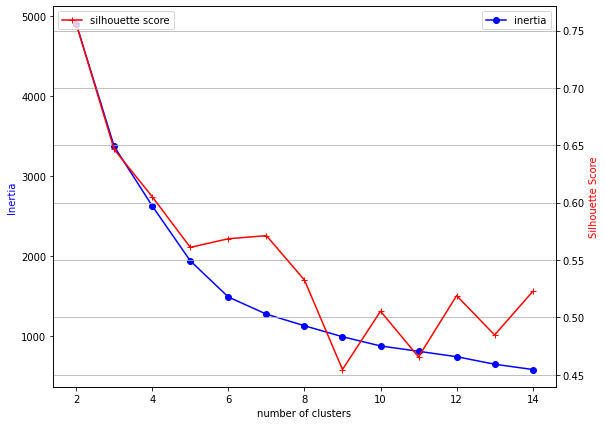

In [89]:
# extract the location data
df_loc = X_train[['latitude','longitude']]

# find K

ks = range(2,15)
plot_k_values(df_loc, ks)

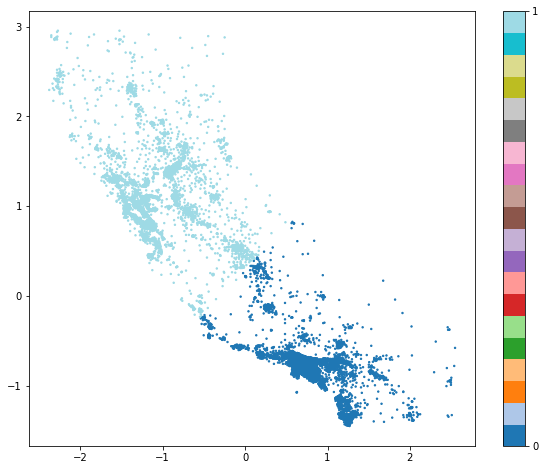

In [94]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(df_loc)

# kmeans
plt.figure(figsize=(10,8))
plt.scatter( x=df_loc["longitude"], y=df_loc["latitude"], c=km.labels_, 
         cmap = 'tab20', s=2)
ticks = np.sort(np.unique(km.labels_))
plt.colorbar(ticks=ticks);

Since I am presenting data on the entire state of California, I'm going to use more than 2 clusters, since this will just split the state into Northern California and Souther California, not giving the best overview of how different pricing really is throughout the state. 

I can get a great overview with using 6 clusters but I feel like 7 is going to give the better split when looking at the pricing details in Central California. 

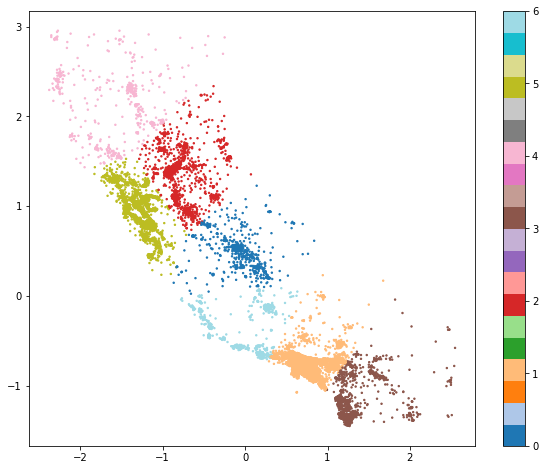

In [93]:
# kmeans = 7

km = KMeans(n_clusters=7, random_state=42)
km.fit(df_loc)

# kmeans
plt.figure(figsize=(10,8))
plt.scatter( x=df_loc["longitude"], y=df_loc["latitude"], c=km.labels_, 
         cmap = 'tab20', s=2)
ticks = np.sort(np.unique(km.labels_))
plt.colorbar(ticks=ticks);